# Data Source

## [kaggle dataset for chess database](https://www.kaggle.com/datasnaek/chess)

## Import the modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline

### Read the csv data 

In [2]:
df=pd.read_csv('games.csv')

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Search the info of the data, shape, check about NaN values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
df.drop('id', axis=1,inplace=True)

In [6]:
df.head(2)

rated           created_at         last_move_at  turns victory_status  \
0  False 1,504,210,000,000.00 1,504,210,000,000.00     13      outoftime   
1   True 1,504,130,000,000.00 1,504,130,000,000.00     16         resign   

  winner increment_code  white_id  white_rating   black_id  black_rating  \
0  white           15+2  bourgris          1500       a-00          1191   
1  black           5+10      a-00          1322  skinnerua          1261   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   

                             opening_name  opening_ply  
0        Slav Defense: Exchange Variation            5  
1  Nimzowitsch Defense: Kennedy Variation            4

In [7]:
# Shape
df.shape

(20058, 15)

In [8]:
#NaN values
df.isna().values.any()

False

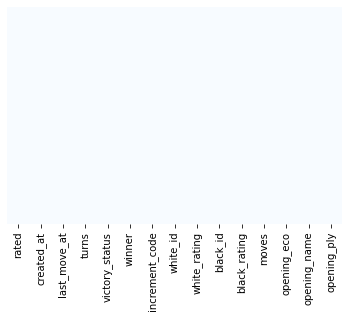

In [9]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [10]:
# Description of the data
df.describe()

created_at         last_move_at     turns  white_rating  \
count            20,058.00            20,058.00 20,058.00     20,058.00   
mean  1,483,616,852,629.09 1,483,617,722,336.14     60.47      1,596.63   
std      28,501,509,421.00    28,501,400,588.89     33.57        291.25   
min   1,376,771,633,173.00 1,376,771,863,841.00      1.00        784.00   
25%   1,477,547,500,000.00 1,477,547,500,000.00     37.00      1,398.00   
50%   1,496,010,000,000.00 1,496,010,000,000.00     55.00      1,567.00   
75%   1,503,170,000,000.00 1,503,170,000,000.00     79.00      1,793.00   
max   1,504,493,143,790.00 1,504,493,827,262.00    349.00      2,700.00   

       black_rating  opening_ply  
count     20,058.00    20,058.00  
mean       1,588.83         4.82  
std          291.04         2.80  
min          789.00         1.00  
25%        1,391.00         3.00  
50%        1,562.00         4.00  
75%        1,784.00         6.00  
max        2,723.00        28.00

# EDA

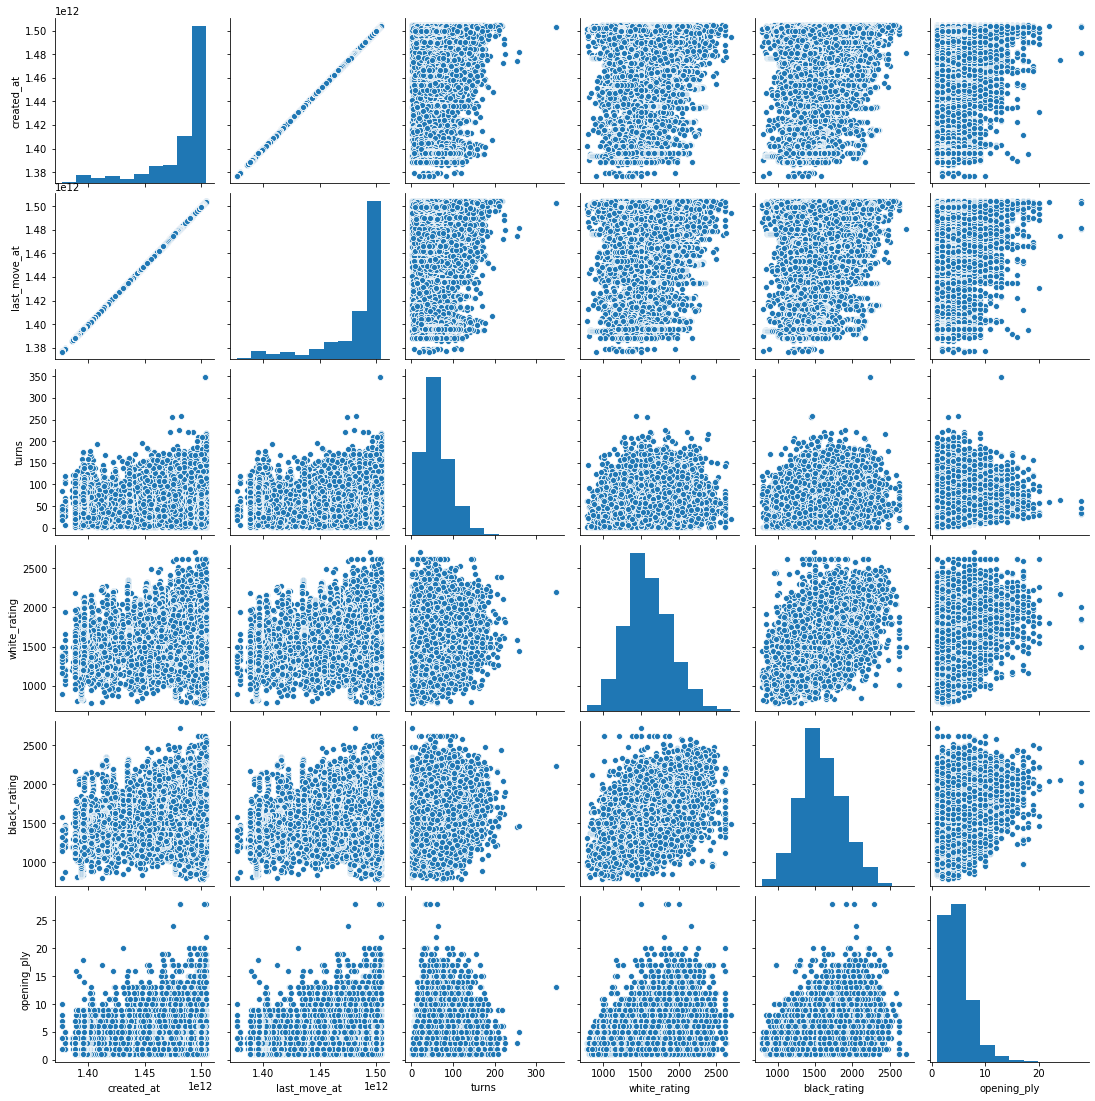

In [11]:
sns.pairplot(df.loc[:, df.columns != 'rated'])

### Count the winnings and draws 

In [12]:
df['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

In [13]:
fig = px.pie(df['winner'].value_counts().index,
values=df['winner'].value_counts().values,
title="Number of winnings games by color and draws",
names=df['winner'].value_counts().index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

Since the draw represents less than 5% of the sample, let's focus on analysing only the games that resulted on winning and losses 

In [14]:
i=df[df['winner']=='draw'].index
df.drop(i,inplace=True)

## Number of turns
It is going to be assumed for this study that the games with less than 20 turns are considered irrelevant

In [15]:
i=df[df['turns']<20].index
df.drop(i,inplace=True)

## Analysing the rate distribution of the players 

In [16]:
ratings_white=df[['white_id','white_rating']].values
ratings_black=df[['black_id','black_rating']].values

In [17]:
ratings_white

array([['ischia', 1496],
       ['daniamurashov', 1439],
       ['nik221107', 1523],
       ...,
       ['jamboger', 1219],
       ['marcodisogno', 1360],
       ['jamboger', 1235]], dtype=object)

In [18]:
ratings_total=np.concatenate((ratings_white,ratings_black),axis=0)

In [19]:
ratings_total

array([['ischia', 1496],
       ['daniamurashov', 1439],
       ['nik221107', 1523],
       ...,
       ['schaaksmurf3', 1286],
       ['jamboger', 1227],
       ['ffbob', 1339]], dtype=object)

In [20]:
dataset_ratings = pd.DataFrame({'id_player': ratings_total[:, 0], 'rating': ratings_total[:, 1]})

In [21]:
ratings_unique=dataset_ratings.groupby(['id_player'], as_index=False).agg({'rating':pd.Series.mean})
ratings_unique.sort_values('rating',ascending=False)

id_player   rating
6579            justicebot 2,700.00
1847           blitzbullet 2,622.00
7281             lance5500 2,617.32
1347              avill050 2,588.00
11549  shahoviy_komentator 2,586.00
...                    ...      ...
4049           epicchess66   795.50
2699      christinebitonti   795.00
9047               natalua   793.00
5537              hortense   791.00
10424  ragnarlothbrook_spb   784.00

[14231 rows x 2 columns]

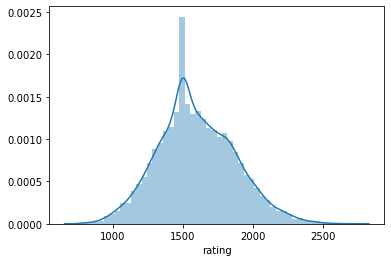

In [22]:
sns.distplot(ratings_unique.rating)

### It would be interesting to attribute to this players the qualitative rating. Acording with the ELO system rating we have:

- 2700+	No formal title, but sometimes informally called "super grandmasters"
- 2500–2700	most Grandmasters (GM)
- 2400–2500	most International Masters (IM) and some Grandmasters (GM)
- 2300–2400	most FIDE Masters (FM) and some International Masters (IM)
- 2200–2300	FIDE Candidate Masters (CM), most national masters
- 2000–2200	candidate masters, experts (USA)
- 1800–2000	Class A, category 1
- 1600–1800	Class B, category 2
- 1400–1600	Class C, category 3
- 1200–1400	Class D, category 4
- below 1200	novices


In [23]:
conditions = [
    (ratings_unique['rating'] <= 1200),
    (ratings_unique['rating'] <= 1400),
    (ratings_unique['rating'] <= 1600),
    (ratings_unique['rating'] <= 1800),
    (ratings_unique['rating'] <= 2000),
    (ratings_unique['rating'] <= 2200),
    (ratings_unique['rating'] <= 2300),
    (ratings_unique['rating'] <= 2400),
    (ratings_unique['rating'] <= 2500),
    (ratings_unique['rating'] <= 2700),
    (ratings_unique['rating'] >  2700)
    ]

# create a list of the values we want to assign for each condition
values = ["Novice", "Class D", "Class C", "Class B","Class A","Candidate Master (CM)",
          "FIDE CM","FIDE Master (FM)","International Master (IM)","GrandMaster (GM)","Super GM"]

# create a new column and use np.select to assign values to it using our lists as arguments
ratings_unique['qualitative_rate'] = np.select(conditions, values)


In [24]:
ratings_unique

id_player   rating qualitative_rate
0                  --jim--   986.00           Novice
1                  -0olo0- 1,860.00          Class A
2      -l-_jedi_knight_-l- 1,473.75          Class C
3                  -pavel- 1,383.00          Class D
4                  1063314 1,670.00          Class B
...                    ...      ...              ...
14226              zzeecco 1,525.00          Class C
14227               zzhdan 1,373.00          Class D
14228            zztopillo 1,471.50          Class C
14229               zzzbbb 1,616.00          Class B
14230              zzzimon 1,375.00          Class D

[14231 rows x 3 columns]

In [25]:
ratings_unique.qualitative_rate.value_counts()

Class C                      4307
Class B                      3260
Class D                      2370
Class A                      2209
Novice                        956
Candidate Master (CM)         842
FIDE CM                       173
FIDE Master (FM)               68
International Master (IM)      36
GrandMaster (GM)               10
Name: qualitative_rate, dtype: int64

In [26]:
bar = px.bar(x=ratings_unique.qualitative_rate.value_counts().index,
             y=ratings_unique.qualitative_rate.value_counts().values,
             color=ratings_unique.qualitative_rate.value_counts().values,
             title='Rating titles among the players')

bar.update_layout(xaxis_title='Title rate', 
                  yaxis_title='Number of players',
                  coloraxis_showscale=False)
bar.show()

## Analysing the most popular openings 

In [27]:
df_openings=df[['opening_name','opening_ply']]

In [28]:
len(df_openings.opening_name.value_counts())

1439

In [29]:
bar = px.bar(x=df_openings.opening_name.value_counts().head(20).index,
             y=df_openings.opening_name.value_counts().head(20).values,
             color=df_openings.opening_name.value_counts().head(20).values,
             title='Most 20 common openings')

bar.update_layout(xaxis_title='Names of the opennings', 
                  yaxis_title='Number of opennings',
                  coloraxis_showscale=False)
bar.show()

## Analysing possible relationship between oppenings and winnings

In [30]:
opening_names = df_openings.groupby(['opening_name'], as_index=False).agg({'opening_ply':pd.Series.count})

In [31]:
winnings_white=df[df['winner']=='white'].groupby(['opening_name'], as_index=False).agg({'opening_ply':pd.Series.count})

In [32]:
Merged_opening_winning_white=opening_names.merge(winnings_white, on='opening_name')
Merged_opening_winning_white.rename(columns={"opening_ply_x": "Number openings", "opening_ply_y": "Number white wins"},inplace=True)


In [33]:
winning_rate=Merged_opening_winning_white

In [34]:
winning_rate['Number black wins']=winning_rate['Number openings']-winning_rate['Number white wins']

In [35]:
winning_rate['rate_white']=winning_rate['Number white wins']/winning_rate['Number openings']*100
winning_rate['rate_black']=winning_rate['Number black wins']/winning_rate['Number openings']*100

In [36]:
wining_rate_top20=winning_rate.sort_values('Number openings',ascending=False)[:20]
wining_rate_top20

opening_name  Number openings  \
932                                Sicilian Defense              308   
1125                           Van't Kruijs Opening              284   
943                Sicilian Defense: Bowdler Attack              264   
285                French Defense: Knight Variation              243   
893   Scandinavian Defense: Mieses-Kotroc Variation              237   
901                                     Scotch Game              236   
768                 Queen's Pawn Game: Mason Attack              210   
758           Queen's Pawn Game: Chigorin Variation              203   
352                                 Horwitz Defense              189   
88                                Caro-Kann Defense              184   
624                             Philidor Defense #2              179   
625                             Philidor Defense #3              170   
880                            Scandinavian Defense              168   
242            Four Knights Game: Italian Variation              163   
359                                     Indian Game              160   
544                                  Modern Defense              158   
376          Italian Game: Anti-Fried Liver Defense              156   
1036                 Sicilian Defense: Old Sicilian              145   
516           King's Pawn Game: Leonardis Variation              139   
615                                    Owen Defense              136   

      Number white wins  Number black wins  rate_white  rate_black  
932                 134                174       43.51       56.49  
1125                 85                199       29.93       70.07  
943                 111                153       42.05       57.95  
285                 131                112       53.91       46.09  
893                 152                 85       64.14       35.86  
901                 131                105       55.51       44.49  
768                 107                103       50.95       49.05  
758                 103                100       50.74       49.26  
352                 100                 89       52.91       47.09  
88                  104                 80       56.52       43.48  
624                  87                 92       48.60       51.40  
625                 110                 60       64.71       35.29  
880                  68                100       40.48       59.52  
242                  90                 73       55.21       44.79  
359                  62                 98       38.75       61.25  
544                  75                 83       47.47       52.53  
376                  90                 66       57.69       42.31  
1036                 58                 87       40.00       60.00  
516                  63                 76       45.32       54.68  
615                  63                 73       46.32       53.68

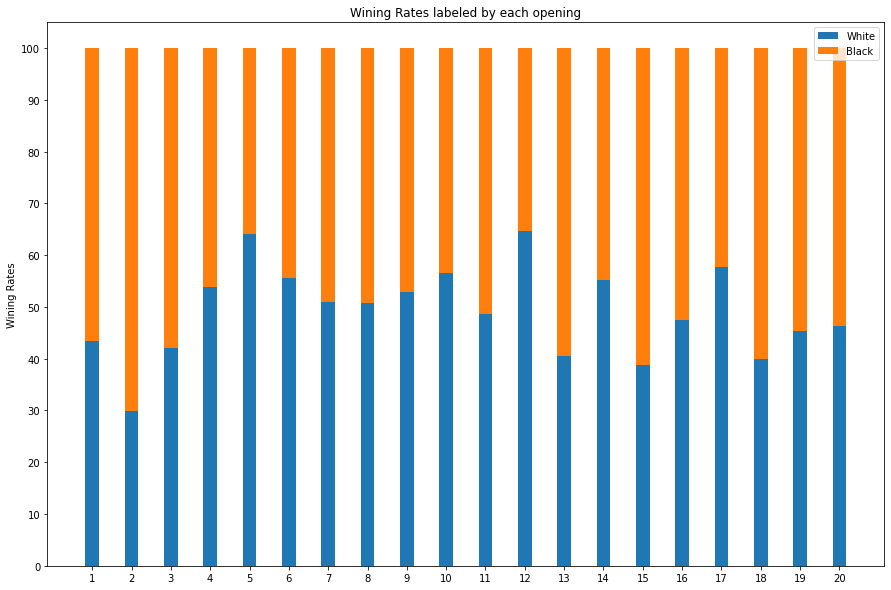

In [37]:
plt.figure(figsize=(15,10))
N = len(wining_rate_top20)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, wining_rate_top20.rate_white, width)
p2 = plt.bar(ind, wining_rate_top20.rate_black, width, bottom=wining_rate_top20.rate_white)

plt.ylabel('Wining Rates')
plt.title('Wining Rates labeled by each opening')
plt.xticks(ind, ('1', '2', '3', '4', '5','6','7','8','9','10','11', '12', '13', '14', '15','16','17','18','19','20'))
plt.yticks(np.arange(0, 110, 10))
plt.legend((p1[0], p2[0]), ('White', 'Black'))

plt.show()

Number of openings on the top 20 that black have higher that 50% chance to win

In [38]:
wining_rate_top20[wining_rate_top20['rate_black']>50].count()[0]

10

List of the opennings wherein black have higher chance than white on winning the game

In [39]:
print(wining_rate_top20[wining_rate_top20['rate_black']>50]['opening_name'])

932                          Sicilian Defense
1125                     Van't Kruijs Opening
943          Sicilian Defense: Bowdler Attack
624                       Philidor Defense #2
880                      Scandinavian Defense
359                               Indian Game
544                            Modern Defense
1036           Sicilian Defense: Old Sicilian
516     King's Pawn Game: Leonardis Variation
615                              Owen Defense
Name: opening_name, dtype: object


Investigate the highest winning rate features for black

In [40]:
wining_rate_top20['rate_black'].idxmax()

1125

In [41]:
wining_rate_top20.loc[wining_rate_top20['rate_black'].idxmax()]

opening_name         Van't Kruijs Opening
Number openings                       284
Number white wins                      85
Number black wins                     199
rate_white                          29.93
rate_black                          70.07
Name: 1125, dtype: object

Now's the white turn: 
- List of the opennings wherein white have higher chance than black on winning the game
- Investigate the highest winning rate features for black

In [42]:
print(wining_rate_top20[wining_rate_top20['rate_white']>50]['opening_name'])

285                 French Defense: Knight Variation
893    Scandinavian Defense: Mieses-Kotroc Variation
901                                      Scotch Game
768                  Queen's Pawn Game: Mason Attack
758            Queen's Pawn Game: Chigorin Variation
352                                  Horwitz Defense
88                                 Caro-Kann Defense
625                              Philidor Defense #3
242             Four Knights Game: Italian Variation
376           Italian Game: Anti-Fried Liver Defense
Name: opening_name, dtype: object


In [43]:
wining_rate_top20['rate_white'].idxmax()

625

In [44]:
wining_rate_top20.loc[wining_rate_top20['rate_white'].idxmax()]

opening_name         Philidor Defense #3
Number openings                      170
Number white wins                    110
Number black wins                     60
rate_white                         64.71
rate_black                         35.29
Name: 625, dtype: object

### Conclusion
- Surprisingly Van't Kruijs Opening is the most openning played in the whole dataset. That's odd since this opening is not the most popular openning in chess. Let's analyse on the database who are the rating players that play this openning 

In [45]:
most_popular_opening=df[df['opening_name']=="Van't Kruijs Opening"]

In [46]:
ratings_white_first_opening=most_popular_opening[['white_id','white_rating']].values
ratings_black_first_opening=most_popular_opening[['black_id','black_rating']].values

In [47]:
ratings_total_first_opening=np.concatenate((ratings_white_first_opening,ratings_black_first_opening),axis=0)

In [48]:
dataset_ratings_first_opening = pd.DataFrame({'id_player': ratings_total_first_opening[:, 0], 'rating': ratings_total_first_opening[:, 1]})

In [49]:
ratings_unique_first_opening=dataset_ratings_first_opening.groupby(['id_player'], as_index=False).agg({'rating':pd.Series.mean})
ratings_unique_first_opening.sort_values('rating',ascending=False)

id_player   rating
343          smchess999 2,257.00
70        camelclutcher 2,197.50
410        youralterego 2,194.00
104            dunker62 2,151.00
328               sazed 2,108.00
..                  ...      ...
5            acidkat930   963.00
348        spiketail118   929.00
216  lucatiel-of-mirrah   885.00
45        austindecoder   838.00
233            mata1234   808.00

[420 rows x 2 columns]

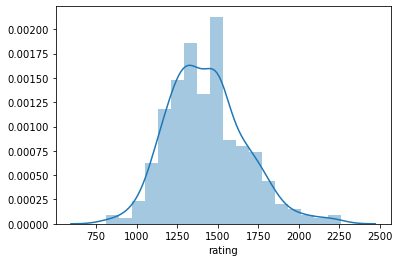

In [50]:
sns.distplot(ratings_unique_first_opening.rating)

In [51]:
ratings_unique_first_opening.describe()

rating
count   420.00
mean  1,428.93
std     236.72
min     808.00
25%   1,261.00
50%   1,407.50
75%   1,565.00
max   2,257.00

In [52]:
len(ratings_unique_first_opening[ratings_unique_first_opening['rating']<1423.14])

215

In [53]:
len(ratings_unique_first_opening[ratings_unique_first_opening['rating']<1260.00])

101

In [54]:
len(ratings_unique_first_opening[ratings_unique_first_opening['rating']<1559.25])

313

In [55]:
len(ratings_unique_first_opening[ratings_unique_first_opening['rating']>2000.00])

9

In [56]:
len(ratings_unique_first_opening[ratings_unique_first_opening['rating']<1200])

67

# Investigate the number of moves per game, the game-mode and victory type

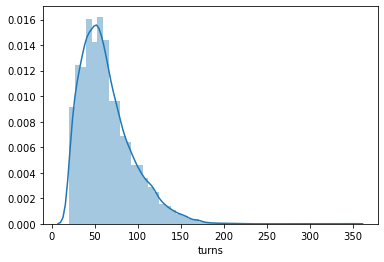

In [57]:
sns.distplot(df['turns'])

In [58]:
df.turns.describe()

count   17,526.00
mean        63.51
std         30.15
min         20.00
25%         41.00
50%         57.00
75%         79.00
max        349.00
Name: turns, dtype: float64

In [59]:
df['game_duration']=df['increment_code'].apply(lambda x: x.split('+')[0])

In [60]:
df['game_duration']=pd.to_numeric(df['game_duration'])

##### Classification according with type of game by categories:
- Classical Chess: > 90 min
- Rapid: > 10min and <60min
- Blitz: <= 10min
- Bullet < 2min


In [61]:
conditions = [
    (df['game_duration']< 2),
    (df['game_duration'] <= 10),
    (df['game_duration'] < 60),
    (df['game_duration'] >= 60)
    ]

# create a list of the values we want to assign for each condition
values = ['Bullet', 'Blitz', 'Rapid', 'Classic']

# create a new column and use np.select to assign values to it using our lists as arguments
df['type_game'] = np.select(conditions, values)

# display updated DataFrame
#df.head()

In [62]:
df['type_game'].value_counts()

Blitz      11865
Rapid       5400
Classic      209
Bullet        52
Name: type_game, dtype: int64

In [63]:
fig = px.pie(df['type_game'].value_counts().index,
values=df['type_game'].value_counts().values,
title="Types of games",
names=df['type_game'].value_counts().index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

In [64]:
i=df[df['type_game']=='Bullet'].index
df.drop(i,inplace=True)

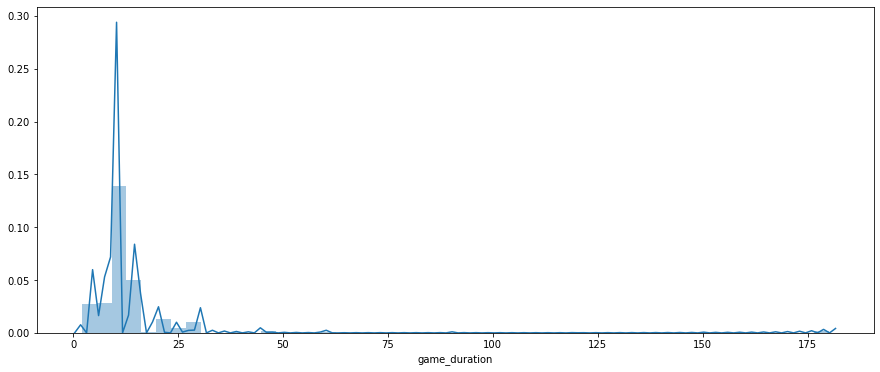

In [65]:
plt.figure(figsize=(15,6))
sns.distplot(df['game_duration'])

In [66]:
df[df['type_game']=='Blitz'][['turns','game_duration']]

turns  game_duration
2         61              5
6         33             10
9        119             10
12        60              5
13        31              8
...      ...            ...
20053     24             10
20054     82             10
20055     35             10
20056    109             10
20057     78             10

[11865 rows x 2 columns]

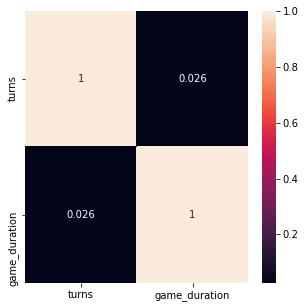

In [67]:
correlations = df[df['type_game']=='Blitz'][['turns','game_duration']].corr()
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(correlations, annot = True)

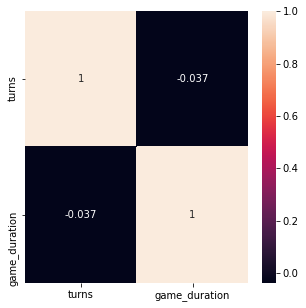

In [68]:
correlations = df[df['type_game']=='Rapid'][['turns','game_duration']].corr()
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(correlations, annot = True)

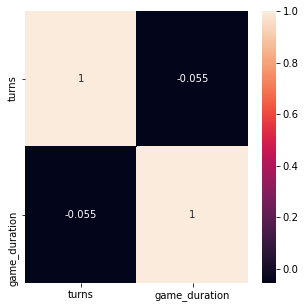

In [69]:
correlations = df[df['type_game']=='Classic'][['turns','game_duration']].corr()
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(correlations, annot = True)

In [70]:
df['victory_status'].value_counts()

resign       9973
mate         6015
outoftime    1486
Name: victory_status, dtype: int64

In [71]:
fig = px.pie(df['victory_status'].value_counts().index,
values=df['victory_status'].value_counts().values,
title="Types of games",
names=df['victory_status'].value_counts().index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

Distribution plot in terms of number of turns for the players who resign

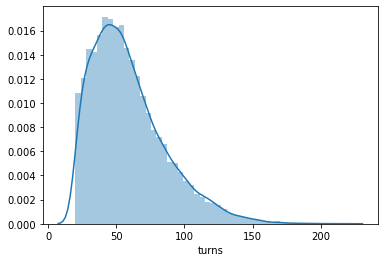

In [72]:
sns.distplot(df[df['victory_status']=='resign']['turns'])

# Investigating the pro players

In [73]:
ratings_unique=dataset_ratings.groupby(['id_player'], as_index=False).agg({'rating':pd.Series.mean})
ratings_unique.sort_values('rating',ascending=False)

id_player   rating
6579            justicebot 2,700.00
1847           blitzbullet 2,622.00
7281             lance5500 2,617.32
1347              avill050 2,588.00
11549  shahoviy_komentator 2,586.00
...                    ...      ...
4049           epicchess66   795.50
2699      christinebitonti   795.00
9047               natalua   793.00
5537              hortense   791.00
10424  ragnarlothbrook_spb   784.00

[14231 rows x 2 columns]

In [74]:
top10_players=ratings_unique.sort_values('rating',ascending=False)[:10]

In [75]:
top10_players

id_player   rating
6579            justicebot 2,700.00
1847           blitzbullet 2,622.00
7281             lance5500 2,617.32
1347              avill050 2,588.00
11549  shahoviy_komentator 2,586.00
12457           teatime007 2,575.25
12915               tree33 2,540.00
7346             le_truand 2,536.50
6900           king-bullet 2,522.00
7446              lexisvar 2,513.00

In [76]:
names=top10_players.id_player.values

In [77]:
names

array(['justicebot', 'blitzbullet', 'lance5500', 'avill050',
       'shahoviy_komentator', 'teatime007', 'tree33', 'le_truand',
       'king-bullet', 'lexisvar'], dtype=object)

In [78]:
df[(df['black_id']=='justicebot') | (df['white_id']=='justicebot')]

rated           created_at         last_move_at  turns victory_status  \
13009  False 1,494,548,121,994.00 1,494,550,103,001.00     20         resign   

      winner increment_code    white_id  white_rating       black_id  \
13009  white          30+30  justicebot          2700  youredeadmeat   

       black_rating                                              moves  \
13009          1486  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 N1e2 Nf6...   

      opening_eco                            opening_name  opening_ply  \
13009         B18  Caro-Kann Defense: Classical Variation            8   

       game_duration type_game  
13009             30     Rapid

In [79]:
len(df[(df['black_id']=='lance5500') | (df['white_id']=='lance5500')]['opening_name'])

38

In [80]:
df[((df['black_id']=='lance5500') & (df['winner']=='black')) | ((df['white_id']=='lance5500') & (df['winner']=='white'))]['opening_name'].values

array(['Sicilian Defense #2',
       'Italian Game: Giuoco Pianissimo |  Italian Four Knights Variation',
       'Van Geet Opening', 'Torre Attack',
       'Caro-Kann Defense: Tartakower Variation',
       'Scandinavian Defense: Mieses-Kotroc Variation',
       "King's Indian Defense: Normal Variation |  King's Knight Variation",
       'Nimzo-Larsen Attack: Indian Variation',
       'Bogo-Indian Defense: Nimzowitsch Variation',
       'Sicilian Defense: Dragon Variation |  Yugoslav Attack |  Old Line',
       'Sicilian Defense: Classical Variation',
       'Sicilian Defense: Classical Variation',
       'Sicilian Defense: Classical Variation',
       'Sicilian Defense: Modern Variations |  Anti-Qxd4 Move Order',
       "Queen's Gambit Declined: Tartakower Variation |  Exchange Variation",
       "Queen's Gambit Declined: Tartakower Variation |  Exchange Variation",
       'Italian Game: Two Knights Defense |  Polerio Defense |  Suhle Defense',
       'Gruenfeld Defense: Stockholm Vari

In [81]:
(df[((df['black_id']=='lance5500') & (df['winner']=='white')) | ((df['white_id']=='lance5500') & (df['winner']=='black'))]['opening_name'].values).tolist()

['Blumenfeld Countergambit Accepted',
 'Russian Game: Modern Attack |  Murrey Variation',
 'Russian Game: Modern Attack |  Center Variation',
 'Zukertort Opening: Old Indian Attack',
 'Italian Game: Two Knights Defense |  Polerio Defense |  Suhle Defense',
 'Sicilian Defense: Alapin Variation',
 'Trompowsky Attack',
 'Italian Game: Two Knights Defense |  Traxler Counterattack |  Bishop Sacrifice Line',
 "Queen's Gambit Declined: Westphalian Variation",
 "Queen's Gambit Declined: Westphalian Variation",
 "King's Indian Defense: Normal Variation"]

In [83]:
win_list_plays_white=[]
win_list_plays_black=[]
lost_list_plays_white=[]
lost_list_plays_black=[]
for name in names:
    win_list_plays_white.extend((df[((df['white_id']==name) & (df['winner']=='white'))]['opening_name'].values).tolist())
    win_list_plays_black.extend((df[((df['black_id']==name) & (df['winner']=='black'))]['opening_name'].values).tolist())
    lost_list_plays_white.extend((df[((df['white_id']==name) & (df['winner']=='black'))]['opening_name'].values).tolist())
    lost_list_plays_black.extend((df[((df['black_id']==name) & (df['winner']=='white'))]['opening_name'].values).tolist())

In [84]:
win_list_plays_white=pd.DataFrame(win_list_plays_white,columns=['Openings'])
win_list_plays_black=pd.DataFrame(win_list_plays_black,columns=['Openings'])
lost_list_plays_white=pd.DataFrame(lost_list_plays_white,columns=['Openings'])
lost_list_plays_black=pd.DataFrame(lost_list_plays_black,columns=['Openings'])

In [85]:
win_list_plays_white.Openings.value_counts()
win_list_plays_black.Openings.value_counts()
lost_list_plays_white.Openings.value_counts()
lost_list_plays_black.Openings.value_counts()

Sicilian Defense: Alapin Variation         1
King's Indian Defense: Normal Variation    1
Trompowsky Attack                          1
Name: Openings, dtype: int64

# Train Test Split

Preparing the columns to analyze

In [194]:
# data=df[df.rated][['turns','winner','white_rating','black_rating','opening_ply','game_duration']]
data=df[df.rated][['winner','white_rating','black_rating']]

In [195]:
data['winner']=data['winner'].apply(lambda x: 1 if x== 'white' else 0)

In [196]:
data.head()

winner  white_rating  black_rating
2       1          1496          1500
3       1          1439          1454
4       1          1523          1469
6       1          1520          1423
8       0          1439          1392

In [197]:
# data=data[data.game_duration>=30]

In [198]:
data.columns

Index(['winner', 'white_rating', 'black_rating'], dtype='object')

In [199]:
X=data.loc[:, data.columns != 'winner'].values

In [200]:
y=data['winner'].values

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [208]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [209]:
X_train

array([[ 1.91522422,  1.39283854],
       [ 1.1519537 ,  1.07975439],
       [-1.35542562, -1.23495762],
       ...,
       [-0.27115348, -0.27811618],
       [-0.13918615, -0.09519061],
       [ 0.54205062, -0.36957896]])

In [210]:
X_test

array([[ 1.23398745,  1.34007154],
       [-0.4530544 , -0.25349158],
       [ 0.0819483 ,  0.08421716],
       ...,
       [-0.02861892, -0.08815501],
       [ 1.18405386,  1.41746313],
       [ 0.90585246,  0.81591943]])

## Training the Logistic Regression model on the Training set

In [211]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Predict the result on the test sample

In [212]:
y_pred = classifier.predict(X_test)

In [213]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [214]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [215]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 65.4969118472768 %


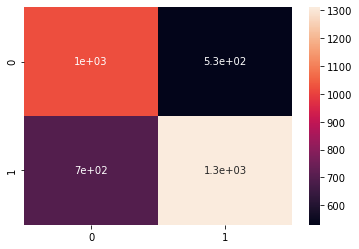

In [216]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [217]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62      1721
           1       0.65      0.71      0.68      1841

    accuracy                           0.65      3562
   macro avg       0.66      0.65      0.65      3562
weighted avg       0.66      0.65      0.65      3562



## Training the RandomForest model on the Training set

In [218]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)


RandomForestClassifier()

In [219]:
y_pred = classifier.predict(X_test)

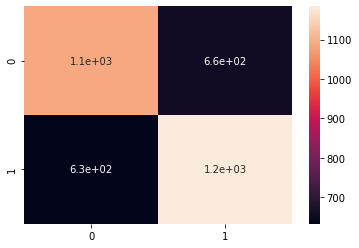

In [220]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [221]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1721
           1       0.65      0.64      0.65      1841

    accuracy                           0.64      3562
   macro avg       0.64      0.64      0.64      3562
weighted avg       0.64      0.64      0.64      3562



## Training the Decision Tree model on the Training set

In [222]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [223]:
y_pred = classifier.predict(X_test)

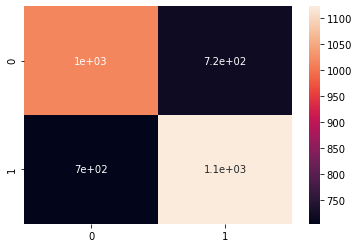

In [224]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [225]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      1721
           1       0.61      0.61      0.61      1841

    accuracy                           0.60      3562
   macro avg       0.60      0.60      0.60      3562
weighted avg       0.60      0.60      0.60      3562



## Training the SVM on the Training set


In [234]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [235]:
y_pred = classifier.predict(X_test)

In [238]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 65.21617069062324 %


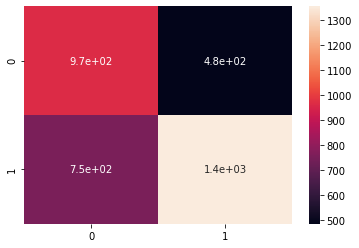

In [236]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1721
           1       0.64      0.74      0.69      1841

    accuracy                           0.65      3562
   macro avg       0.65      0.65      0.65      3562
weighted avg       0.65      0.65      0.65      3562



## Training the Naive Bayes model on the Training set

In [230]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [231]:
y_pred = classifier.predict(X_test)

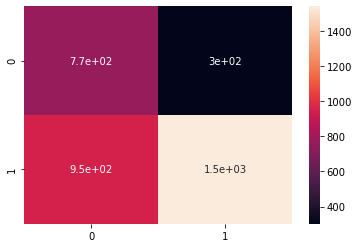

In [232]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [233]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.45      0.55      1721
           1       0.62      0.84      0.71      1841

    accuracy                           0.65      3562
   macro avg       0.67      0.64      0.63      3562
weighted avg       0.67      0.65      0.63      3562



## Conclusions
- After running the ML models for classification problem, it is observed that the precision is not very high, around 65%. Looking at the confusion matrices, it is observed a several number of missclassified results either for black winning or white. Indeed, for black the recall is a litte lower than the white. 
- Right now, the model is trying to predict winning based on the rating, but using the rating features by itself is not enough. A way to improve this model was to feed the database with more information regarding for example the number of blunders made by the players during the game. Since Lichess is an online platform, the probabilities of more blunders, even for higher rated players, are hihger than a real tournment in person. Thus, a column with the number of blunders per each player during the game could improve the confusion matrix scores 